In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense , LSTM

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:/Users/aidin/Downloads/خگستر.csv')
df= df.set_index('date')

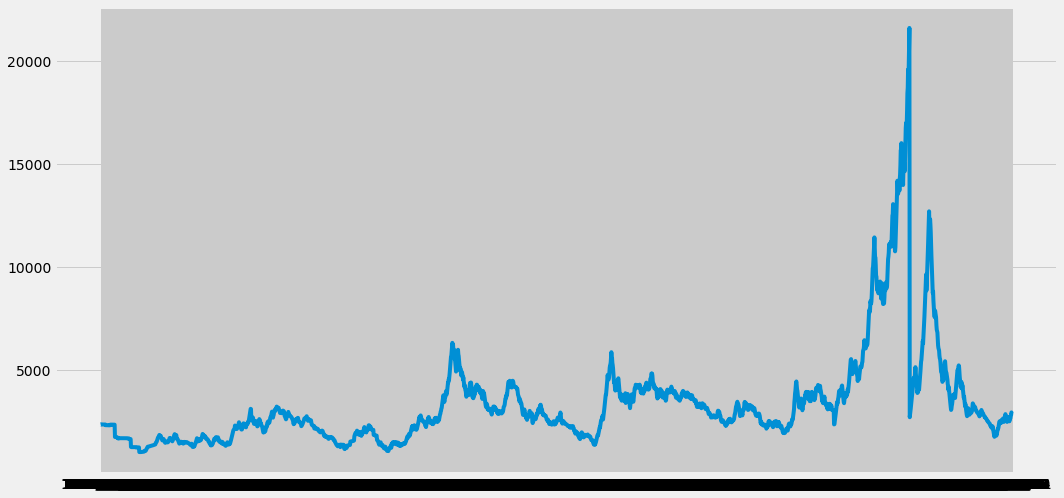

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['close'])
plt.show()

In [4]:
data=df.filter(['close'])
dataset=data.values


In [5]:
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.06537825],
       [0.06552429],
       [0.06503748],
       ...,
       [0.08728459],
       [0.0935644 ],
       [0.09156849]])

In [6]:
training_data=scaled_data[0:training_data_len , :]


xtrain=[]
ytrain=[]
n = 100


for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])


In [7]:
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape


(2088, 100, 1)

In [8]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
model.fit(xtrain,ytrain,epochs=15,batch_size=5)

Epoch 1/15
105/105 [==============================] - 9s 85ms/step - loss: 2.3546e-05
Epoch 2/15
105/105 [==============================] - 10s 95ms/step - loss: 2.4755e-05
Epoch 3/15
105/105 [==============================] - 10s 99ms/step - loss: 2.5961e-05
Epoch 4/15
105/105 [==============================] - 11s 106ms/step - loss: 2.2331e-05
Epoch 5/15
105/105 [==============================] - 9s 90ms/step - loss: 2.8483e-05
Epoch 6/15
105/105 [==============================] - 11s 101ms/step - loss: 2.0496e-05
Epoch 7/15
105/105 [==============================] - 10s 90ms/step - loss: 2.3694e-05
Epoch 8/15
105/105 [==============================] - 9s 90ms/step - loss: 2.1275e-05
Epoch 9/15
105/105 [==============================] - 9s 83ms/step - loss: 2.1565e-05
Epoch 10/15
105/105 [==============================] - 10s 99ms/step - loss: 2.3602e-05
Epoch 11/15
105/105 [==============================] - 14s 134ms/step - loss: 1.8291e-05
Epoch 12/15
105/105 [=====================

In [12]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])

In [13]:
xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))

In [14]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))
rmse


933.3772885722753

In [15]:

train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

E:\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


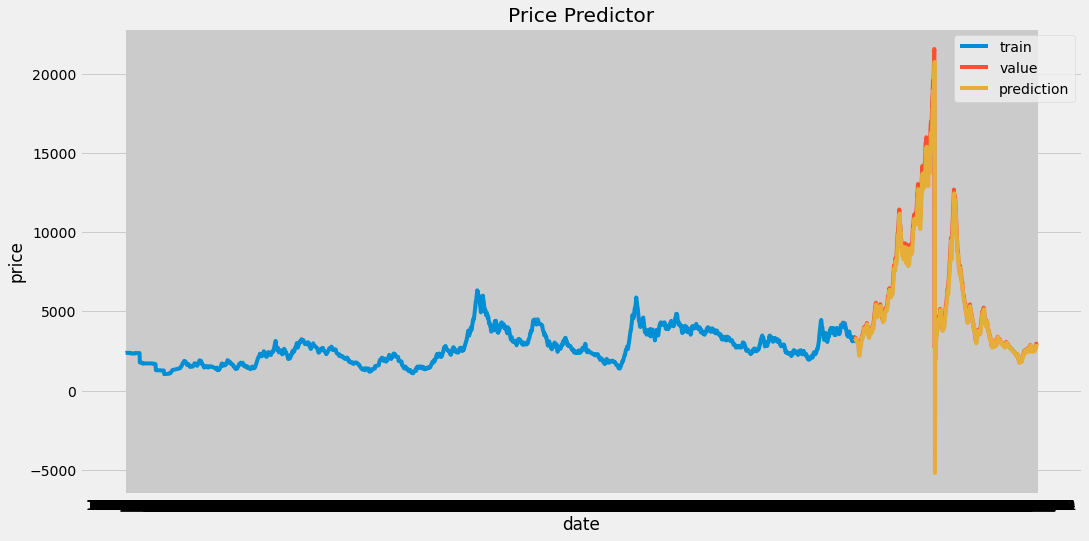

In [16]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor')
plt.xlabel('date')
plt.ylabel('price')
plt.plot(train['close'])
plt.plot(valid[['close','prediction']])
plt.legend(['train','value','prediction'])
plt.show()

In [17]:
valid


,close,prediction
date,,
1397/12/07,3332.0,3303.296387
1397/12/08,3346.0,3264.509033
1397/12/11,3269.0,3286.511230
1397/12/12,3229.0,3186.845947
1397/12/13,3288.0,3158.968506
...,...,...
1400/05/20,2681.0,2661.615479
1400/05/23,2806.0,2638.622559
1400/05/24,2833.0,2792.745850


In [18]:
newdf=data[-50:].values
scalednewdf=scaler.transform(newdf)


In [19]:
xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [20]:

pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
print('Next Day Prediction:  ' , pred)

Next Day Prediction:   [[2862.3486]]
